## Setup and Imports

In [144]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [145]:
import geopandas as gpd

# Extension of GeoPandas GeoProcessing

In 220_geopandas_gp, we worked to select tracts in Riverside, CA that intersected a highway. In order to extend this example, we  may be interested in looking at the tracts that neighbor a tract that intersects the highway. This was, we would be albe to denote the tracts that are located near the highway, which may be a feature important to some individuals. To do this, we will first load in data needed to complete this.

In [133]:
city_tracts = gpd.read_file('data/city_tracts.shp')
b500 = gpd.read_file('data/b500.shp')

Here, we are interested in selecting only the GEOID and the geometry in order to preform a spatial join to create the an object that highlights the tracts that are intersected by a highway

In [135]:
ct = city_tracts[['GEOID10', 'geometry']]
b500.crs = ct.crs

In [143]:
# Using a spatial join to select tracts that contain a highway
tracts_intersecting_hw = gpd.sjoin(ct, b500, how='inner', op='intersects')

Here, we will now apply a buffer to the tracts that are intersected by a highway to determine the neighborring tracts.

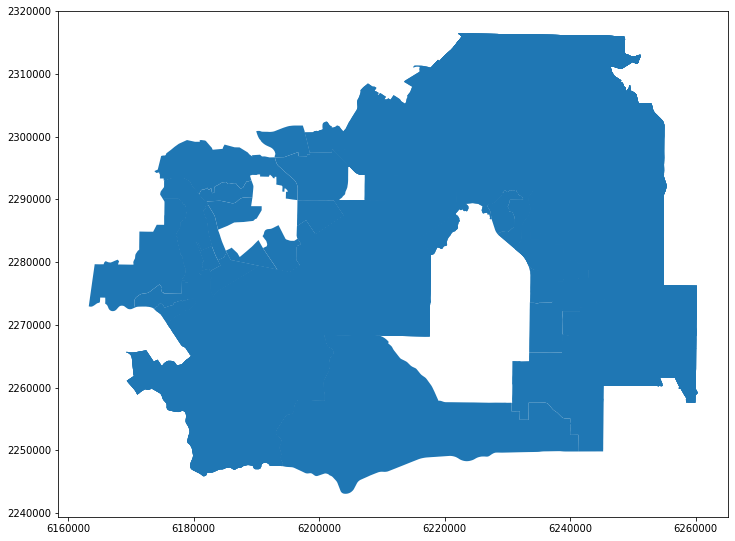

In [137]:
#Applying the 500 buffer to the tracts that have a highway intersecting it
buff_tracts500 = tracts_intersecting_hw.buffer(500)

#converting the geoseries into a geodataframe
ct = city_tracts[['GEOID10', 'geometry']]
tract500 = gpd.GeoDataFrame({'geometry': buff_tracts500})
tract500.crs = ct.crs

#Preforming a spatial join using the buffered object
tracts_near_hw = gpd.sjoin(ct, tract500, how='inner', op='intersects')
tracts_near_hw.plot()

Now, we want to make a column in city_tracts that highlight the tracts that are neighboring tracts that have a highway intersecting it so that we can plot the final results

In [141]:
near_hw = np.array([geoid in tracts_near_hw['GEOID10'].values for geoid in geoids])
near_hw

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True])

In [142]:
city_tracts['nearhw'] = near_hw * 1

Plotting the final map with the tracts that are near the highway 

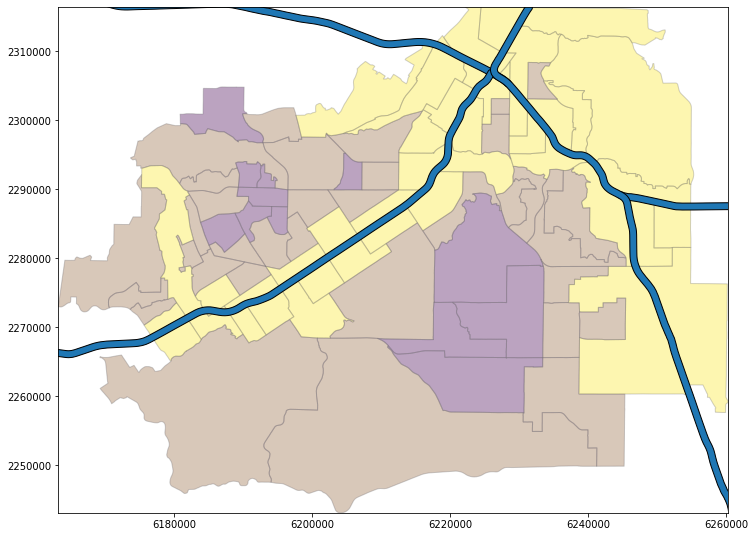

In [140]:
w, s, e, n = city_tracts.total_bounds
plt.rcParams['figure.figsize'] = (12, 10)
ax = plt.gca()
city_tracts.plot(ax=ax, column='nearhw',edgecolor='grey', alpha=0.2)
city_tracts.plot(ax=ax, column='b500',edgecolor='grey', alpha=0.2)
b500.plot(ax=ax, edgecolor='k')
ax.set_xlim(w, e); ax.set_ylim(s, n)
#ax.set_aspect('equal')
plt.show()

# Extension of GeoVisualization

In the geovisualization tutorial, choropleth maps in addition to choropleth by alpha value maps were heavily discussed. In this extension, I focus on the creation of choropleth maps in addition choropleth by alpha value maps in order to better illustrate how these variations manifest themselves in a map format.

In [147]:
from pysal.viz.splot.mapping import vba_choropleth
from pysal.lib import examples

/Users/markbaker/anaconda3/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


Here, I am loading in the columbus shpaefile and looking at the variables contains in the columbus attribute table.

In [148]:
link_to_data = examples.get_path('columbus.shp')
gdf = gpd.read_file(link_to_data)
gdf.columns

Index(['AREA', 'PERIMETER', 'COLUMBUS_', 'COLUMBUS_I', 'POLYID', 'NEIG',
       'HOVAL', 'INC', 'CRIME', 'OPEN', 'PLUMB', 'DISCBD', 'X', 'Y', 'NSA',
       'NSB', 'EW', 'CP', 'THOUS', 'NEIGNO', 'geometry'],
      dtype='object')

Looking at the columns in the columbus shapefile, I have decide to focus this extension on the House value attribute and the income attribute.

In [150]:
x = gdf['HOVAL'].values
y = gdf['INC'].values

Here, I will first examine the house values and the income individually first to better understand each directly, where the buckets are established by examining the quantile for the attributes.

Text(0.5, 1, 'Normal Choropleth for Income')

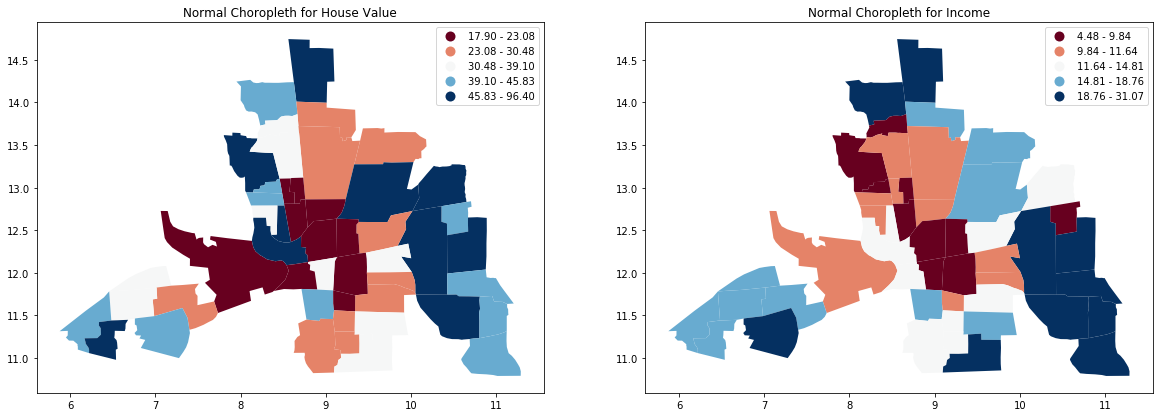

In [152]:
fig, axs = plt.subplots(1,2, figsize=(20,10))

# use gdf.plot() to create regular choropleth
gdf.plot(column='HOVAL', scheme='quantiles', cmap='RdBu', legend=True, ax=axs[0])

gdf.plot(column='INC', scheme='quantiles', cmap='RdBu',legend=True, ax=axs[1])

axs[0].set_title('Normal Choropleth for House Value')
axs[1].set_title('Normal Choropleth for Income')

Now, I will examine the choropleth by alpha value maps, presenting one where income is used as the transparency mask and one where house value is used as a transparency mask.

Text(0.5, 1, 'Choropleth for House Value where Income is transparency mask')

<Figure size 1080x720 with 0 Axes>

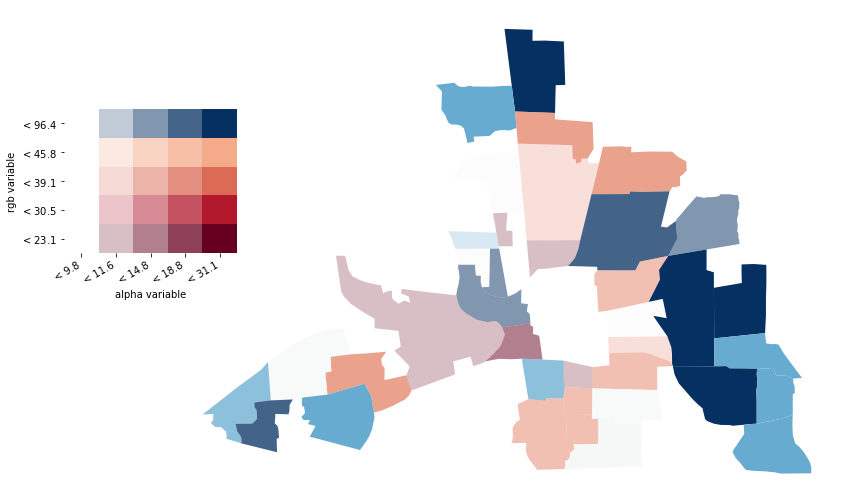

In [157]:
fig = plt.figure(figsize=(15,10))
vba_choropleth(x, y, gdf, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='RdBu', legend=True,)
axs[0].set_title('Choropleth for House Value where Income is Transparency mask')

Text(0.5, 1, 'Choropleth for Income where House Value is Transparency mask')

<Figure size 1080x720 with 0 Axes>

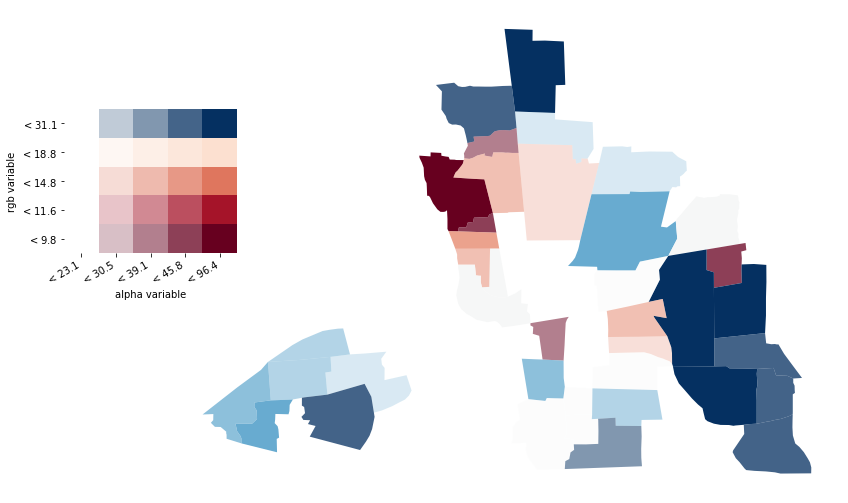

In [158]:
fig = plt.figure(figsize=(15,10))
vba_choropleth(y, x, gdf, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='RdBu', legend=True,)
axs[0].set_title('Choropleth for Income where House Value is Transparency mask')

Looking at the outcome, we see that by change which variable is the transparency mask greatly affects the output.